In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
cf3  = np.genfromtxt('cf3.csv' , delimiter='|', filling_values=-1, names=True, dtype=None, encoding=None)
pgc_cf3 = cf3['PGC']
DM_cf3  = cf3['DM']
eDM_cf3 = cf3['eDM']
N_cf3   = cf3['N']  
C_cf3   = cf3['C']  
F_cf3   = cf3['F']
I_cf3   = cf3['I']
S_cf3   = cf3['S']
H_cf3   = cf3['H']
VVmod_cf3 = cf3['Vmod']
Ks_cf3 = cf3['Ks']

In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
table = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ip  = table["pgc"]
p2  = table["P0_w2"]
p2p = table["P0_w2p"]
p1  = table["P0_w1"]
rs  = table["R_source"]

In [5]:
for i, id in enumerate(ip):
    
    if id==28120: #p1[i]!=0:
        delta = np.abs(p1[i]-p2[i])
#         if delta > 1.7:
        print id, p1[i], p2[i], p2p[i], '%.1f'%delta, rs[i]

            


28120 13.13 13.47 14.18 0.3 2


In [56]:
table = np.genfromtxt('DMs_EDD.csv.test' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod_edd   = table['Vmod']
Vls_edd   = table['Vls']

# DM_edd  = table['DMr']
# dDM_edd = table['dDMr']
# DM_edd_raw  = table['DMr_raw']

DM_edd  = table['DMi']
dDM_edd = table['dDMi']
DM_edd_raw  = table['DMi_raw']

# DM_edd  = table['DMz'] 
# dDM_edd = table['dDMz']
# DM_edd_raw  = table['DMz_raw']

DM_edd  = table['DM_w1']
dDM_edd = table['dDM_w1']
DM_edd_raw  = table['DMw1_raw']


ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

RS = table['RS']
P0 = table['P0']


I = iii-DM_edd


W1 = w11-DM_edd
print len(pgc_edd)

g_i = ggg-iii

i_w = iii-w11

10737


In [57]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']

g = 0
for i, id in enumerate(pgc_edd):
    delta = np.abs(DMi[i]-DM_w1[i])
    if delta > 1 and Sqlt[i]>0 and Wqlt[i]>0:
        print id, Sqlt[i], Wqlt[i], DM_edd[i], DM_edd_raw[i], "%.2f"%delta, "%.2f"%P0[i], RS[i], logWimx_e[i]
        g+=1
        
print g

4539 3 4 34.32 34.49 3.38 -2.61 1 0.017
27785 5 4 28.85 27.0 1.09 -4.27 2 0.066
42422 4 5 28.64 25.44 2.99 -5.02 2 0.126
50782 4 5 29.77 30.01 1.11 4.76 2 0.009
72882 2 3 30.41 30.49 1.26 -1.44 1 0.021
90661 5 1 18.06 18.17 17.25 -2.99 2 0.045
90844 4 1 32.23 32.05 1.53 -0.41 2 0.034
1641818 5 2 38.12 36.49 1.16 -2.70 0 0.092
8


In [58]:
g = 0
for i, id in enumerate(pgc_edd):
    delta = np.abs(DM_edd[i]-DM_edd_raw[i])
    if delta > 2: # id == 39573: #
        print id, Sqlt[i], Wqlt[i], DM_edd[i], DM_edd_raw[i], "%.2f"%delta, P0[i], RS[i], logWimx_e[i]
        g+=1
        
print g

20479 0 5 27.87 25.22 2.65 -0.92 2 0.093
42422 4 5 28.64 25.44 3.20 -5.02 2 0.126
2


In [59]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


faint = np.genfromtxt('TF_faint.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_faint = drop['PGC']

In [60]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod_edd) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop and not idd in pgc_faint:
        
        keep[i] = 1
    else:
        p+=1

        
print p

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


474


In [61]:
# indx, = np.where((logH<10) & (logH>0.5) & (Vmod_edd>4000) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
#                  & (Sqlt>3) & (keep==1) & (logWimx>0) & (iii<100) & (DM_edd>0) & (RS>-1))

indx, = np.where((logH<2.5) & (logH>1.5) & (Vmod_edd>4000) & (w11>0) & (Wqlt>3) & 
                 (keep==1) & (W1<-16.1))# & (logWimx>2.2) & (logWimx<2.7))# & (iii>0) & (I<-17)& (Sqlt>3))

Vmod = Vmod_edd[indx]
X0 = logWimx[indx]
X1  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vls_edd[indx]
Y  = logH[indx]
lgD = logD[indx]
I = I[indx]
ID = pgc_edd[indx]
DM = DM_edd[indx]
INC = inc[indx]
mag_i = iii[indx]
mag_z = zzz[indx]
GI = g_i[indx]
W1 = W1[indx]
w1_mag = w11[indx]
P = X0/X1

P0 = P0[indx]

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [62]:
# def hf(x,x0,a,c):
    
#     y = a*x**2-2*a*x0*x+c
    
#     try: 
#         y[x<x0] = -a*x0**2+c
#     except:
#         if x<x0: y=0
    
#     return y


# fig = py.figure(figsize=(5,5), dpi=100)    
# fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
# ax = fig.add_subplot(111)


# ax.plot(mag_i,Y, 'k.', alpha=0.1)
# # ax.set_ylim(-0.02, 0.2)


# for i, id in enumerate(ID):
    
#     if id in pgc_cf3:
#         ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
        
# X = mag_i 


# for i in np.arange(11,18,0.5):
#     xp = []
#     yp = []
#     for ii in range(len(X)):
#         xi = X[ii]
#         if xi>=i and xi<i+0.5:
#             xp.append(xi)
#             yp.append(Y[ii])
#     if len(xp)>0:
#         ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
#                     color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

# ax.set_xlabel(r'$i^*$', fontsize=18) 
# ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

# v = np.linspace(11,18,50)


# fit, cov = curve_fit(hf, X, Y, sigma=Ye)
# ax.plot(v,hf(v, fit[0], fit[1], fit[2]), '--')


# set_axes(ax, fontsize=12)



# # y = Y[(mag_i>12) & (mag_i<15)]
# # ye = Ye[(mag_i>12) & (mag_i<15)]
# # print 10**np.median(Y)
# # print  10**(np.sum(y/ye)/np.sum(1./ye))
# # med = np.median(Y)
# # print "med0= ", med, 10**med

# print "Fit med:", 10**(hf(fit[0], fit[0], fit[1], fit[2]) )
# med = (hf(fit[0], fit[0], fit[1], fit[2]) )


# print "med: ", med, 10**med

# ax.set_xlim(11,18)

# print fit

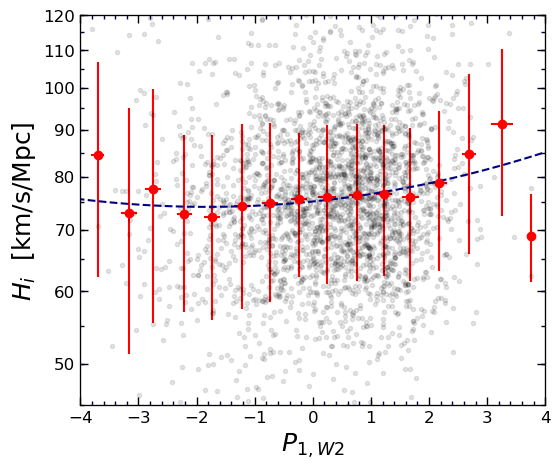

In [63]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(P0,10**Y, 'k.', alpha=0.1)

        
        
X = P0 

for i in np.arange(-4,4,0.5):
    xp = []
    yp = []
    ype = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>0:
        yp = np.asarray(yp)
        xp = np.asarray(xp)
        ype = np.asarray(ype)
        yy =  np.sum(yp/ype)/np.sum(1./ype)
        H = 10**yy
        ax.errorbar(np.median(xp), H, yerr=np.std(yp)*H*np.log(10), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     

ax.set_xlabel(r'$P_{1,W2}$', fontsize=18) 
ax.set_ylabel(r'$H_i$'+ '  [km/s/Mpc]', fontsize=18) 





v = np.linspace(-5, 5, 50)
c, cov = np.polyfit(X, Y, 2, w=1./Ye, cov=True)
ax.plot(v,10**(c[0]*v**2+c[1]*v+c[2]), '--', color='navy')



x_ax, y_ax = set_axes(ax, (-4,4), (45,120), fontsize=12) 

ax.set_yscale('log')

from matplotlib.ticker import MultipleLocator

from matplotlib.ticker import NullFormatter
ax.yaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_minor_formatter(NullFormatter())

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

plt.yticks([50,60,70,80,90,100,110,120], ('50','60','70','80','90','100','110','120'))
# ax.set_yticks(np.arange(50,140, step=10))



y_ax.set_yticks(np.arange(45,120, step=10))
y_ax.set_yscale('log')
y_ax.yaxis.set_major_formatter(NullFormatter())  
y_ax.yaxis.set_minor_formatter(NullFormatter())
y_ax.yaxis.set_major_locator(MultipleLocator(10))
y_ax.yaxis.set_minor_locator(MultipleLocator(5))

In [64]:
print 10**np.median(Y)

75.43120406617504


-3.7 70.62284065606724
-3.17 72.94481961480628
-2.75 73.10041077951429
-2.21 74.49340340129284
-1.73 73.05171816439892
-1.21 73.31656757418321
-0.74 74.38606091245173
-0.24 74.80847925264361
0.245 75.53748040619304
0.76 76.58053967740612
1.23 75.61110801261547
1.68 76.07788271489547
2.17 77.34326176154094
2.69 81.23090037783153
3.25 92.23006378121492
3.76 69.64221263176557
[1.76499137e-03 6.42269610e-03 1.87599279e+00]
1.8775510401714937 75.43120406617504
0.002\pm0.001
0.006\pm0.001
1.876\pm0.002


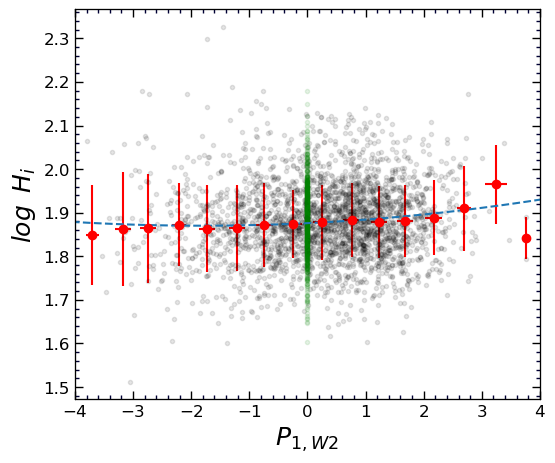

In [65]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(P0,Y, 'k.', alpha=0.1)


for i, id in enumerate(ID):
    
    if id in pgc_cf3:
        ax.plot(mag_i[i], Y[i], 'g.', alpha=0.1)  
        
        
        
X = P0 


for i in np.arange(-4,4,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$P_{1,W2}$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 




ax.set_xlim(-4,4)

v = np.linspace(-5, 5, 50)
c, cov = np.polyfit(X, Y, 2, w=1./Ye, cov=True)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], '--')

# Y = Y - (c[0]*X**2+c[1]*X+c[2]) + med

print c
med = np.median(Y)
print med, 10**med


set_axes(ax, fontsize=12)


for i in range(len(c)):
        print '%.3f'%c[i]+'\pm'+'%.3f'%np.sqrt(cov[i][i])

In [66]:
# def fitFunc(x,m,b,c):
    
    
#     y = c + 1./(m*x+b)
  
#     return y


# fig = py.figure(figsize=(5,5), dpi=100)    
# fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
# ax = fig.add_subplot(111)


# v = np.linspace(0,0.1,50)

# X = X1

# xx = X
# yy = Y

# c0 = np.polyfit(X[X<0.1],Y[X<0.1], 2, w=1./Ye[X<0.1])
# c, cov = curve_fit(fitFunc, X[X<0.07], Y[X<0.07])

# print 'C= ', c0


# print 'Median = ', med,  10**med

# ax.plot(X, 10**Y, 'k.', alpha=0.1)
# ax.plot(v, 10**(c0[0]*v**2+c0[1]*v+c0[2]), '--', color='navy')
# # ax.plot(v, 10**fitFunc(v, c[0], c[1], c[2]), '--', color='orange')


# XL = []
# YL = []
# YLe = []
# for i in np.arange(0.005,0.1,0.005):
#     xp = []
#     yp = []
#     ype = []
#     for ii in range(len(X)):
#         xi = X[ii]
#         if xi>=i and xi<i+0.005:# and ID[ii] in pgc_cf3:
#             xp.append(xi)
#             yp.append(Y[ii])
#             ype.append(Ye[ii])
#     if len(xp)>10:
#         sqN = np.sqrt(len(xp))
        
#         yp = np.asarray(yp)
#         xp = np.asarray(xp)
#         ype = np.asarray(ype)
#         yy =  np.sum(yp/ype)/np.sum(1./ype)
#         H = 10**yy
#         ax.errorbar(np.median(xp), H, yerr=np.std(yp)*H*np.log(10.), xerr=np.std(xp), fmt='o', 
#                     color='r', ms=6) 

#         XL.append(np.median(xp))
#         YL.append(np.median(yp))
#         YLe.append(np.median(np.std(yp/sqN)))

# ax.set_xlabel(r'$err(log \/ W^i_{mx})$', fontsize=18) 
# ax.set_ylabel(r'$H^{(1)}_{i}$'+ '  [km/s/Mpc]', fontsize=18) 



# x_ax, y_ax = set_axes(ax, (0,0.1), (45,120), fontsize=12) 

# ax.set_yscale('log')

# from matplotlib.ticker import MultipleLocator

# from matplotlib.ticker import NullFormatter
# ax.yaxis.set_major_formatter(NullFormatter())  
# ax.yaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.yticks([50,60,70,80,90,100,110,120], ('50','60','70','80','90','100','110','120'))
# # ax.set_yticks(np.arange(50,140, step=10))



# y_ax.set_yticks(np.arange(45,120, step=10))
# y_ax.set_yscale('log')
# y_ax.yaxis.set_major_formatter(NullFormatter())  
# y_ax.yaxis.set_minor_formatter(NullFormatter())
# y_ax.yaxis.set_major_locator(MultipleLocator(10))
# y_ax.yaxis.set_minor_locator(MultipleLocator(5))

C=  [-3.81848513  0.17075365  1.87918409]
Median =  1.8775510401714937 75.43120406617504
0.007 76.56418730879732
0.012 76.61983714005753
0.017 75.27830238760208
0.022 74.38783977425265
0.027 74.89653699875251
0.032 75.08781785174672
0.037 76.00941194044454
0.042 75.6003378256215
0.047 77.36669256897159
0.052 77.08794312211313
0.056 70.8790651022466
75.43120406617504


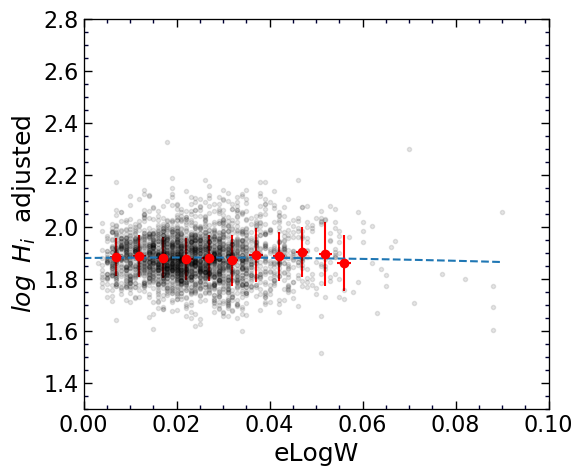

In [67]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.set_xlim(0,0.1)
ax.set_ylim(1.3,2.8)
v = np.linspace(0,0.09,50)

X = X1

xx = X
yy = Y

c = np.polyfit(X[X<0.1],Y[X<0.1], 2, w=1./Ye[X<0.1])


print 'C= ', c


print 'Median = ', med,  10**med

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v, c[0]*v**2+c[1]*v+c[2], '--')







XL = []
YL = []
YLe = []
for i in np.arange(0.005,0.08,0.005):
    xp = []
    yp = []
    ype = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.005:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        
        yp = np.asarray(yp)
        xp = np.asarray(xp)
        ype = np.asarray(ype)
        yy =  np.sum(yp/ype)/np.sum(1./ype)
        ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{i}$'+'  adjusted', fontsize=18) 



set_axes(ax)

print 10**med

# Y = Y - (c[0]*X**2+c[1]*X+c[2]) + med  


2.271 84.56771005046026
2.361 78.25355434589638
2.455 76.09331141845757
2.55 75.10000490962285
2.644 74.46183430008381
2.733 71.99462687221667
[-0.08323024  2.09406673]


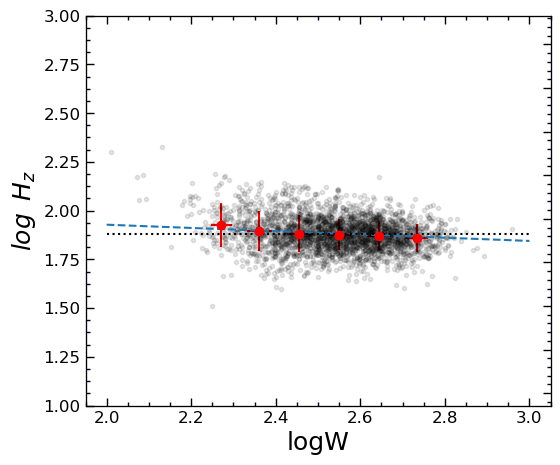

In [68]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2.2,2.8,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X[(X>2.2)&(X<2.8)],Y[(X>2.2)&(X<2.8)], 1, w=1./Ye[(X>2.2)&(X<2.8)])
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)

# 
# Y = Y - (c[0]*X+c[1])+ med
# 

ax.set_ylim(1,3)

ax.plot([2.0, 3.0],[med, med], ':', color= 'k')

4626 75.6
5472 75.6
6468 75.2
7468 75.6
8491 75.9
9493 73.8
10401 73.1
11607 75.0
12411 77.9
13458 76.7
14506 70.3
15056 65.9
16298 76.8
17232 69.5
76.65113743402658 73.25994558198398
[-1.78654655e-06  1.89166479e+00]
1.8845186037782105
75.43120406617504
75.7653892672881


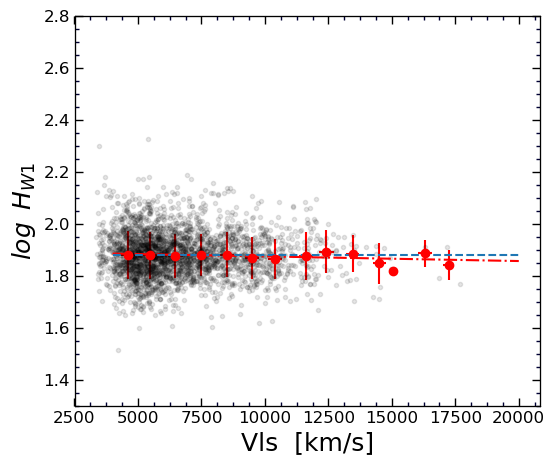

In [69]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = V

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls  [km/s]', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{W1}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1./Ye[X>4000])
ax.plot(v,c[0]*v+c[1], 'r-.')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print 10**np.median(Y)
m = (np.sum(Y[X>4000]/Ye[X>4000])/np.sum(1./Ye[X>4000]))
H0 = 10**m
print  H0

ax.plot([4000,20000], [m,m], '--')

In [70]:
len(Y)

2780

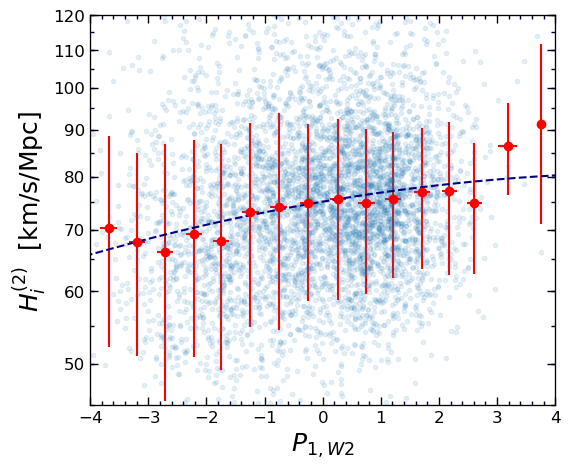

In [21]:
def hf(x,x0,a,c):
    
    y = a*x**2-2*a*x0*x+c
    
    try: 
        y[x<x0] = -a*x0**2+c
    except:
        if x<x0: y=0
    
    return y


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.plot(P0,10**Y, '.', alpha=0.1)

        
        
X = P0 


for i in np.arange(-4,4,0.5):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.5:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        H=10**np.median(yp)
        ax.errorbar(np.median(xp), H, yerr=np.std(yp)*H*np.log(10), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     

ax.set_xlabel(r'$P_{1,W2}$', fontsize=18) 
ax.set_ylabel(r'$H^{(2)}_i$'+ '  [km/s/Mpc]', fontsize=18) 





v = np.linspace(-5, 5, 50)
c, cov = np.polyfit(X, Y, 2, w=1./Ye, cov=True)
ax.plot(v,10**(c[0]*v**2+c[1]*v+c[2]), '--', color='navy')



x_ax, y_ax = set_axes(ax, (-4,4), (45,120), fontsize=12) 

ax.set_yscale('log')

from matplotlib.ticker import MultipleLocator

from matplotlib.ticker import NullFormatter
ax.yaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_minor_formatter(NullFormatter())

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

plt.yticks([50,60,70,80,90,100,110,120], ('50','60','70','80','90','100','110','120'))
# ax.set_yticks(np.arange(50,140, step=10))



y_ax.set_yticks(np.arange(45,120, step=10))
y_ax.set_yscale('log')
y_ax.yaxis.set_major_formatter(NullFormatter())  
y_ax.yaxis.set_minor_formatter(NullFormatter())
y_ax.yaxis.set_major_locator(MultipleLocator(10))
y_ax.yaxis.set_minor_locator(MultipleLocator(5))

C=  [10.55419328 -0.85497119  1.88323932]
Median =  1.8697620208282455 74.09041388100808


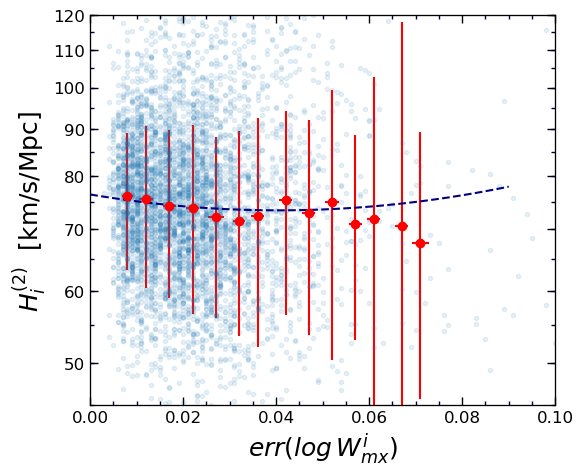

In [22]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


ax.set_xlim(0,0.1)
ax.set_ylim(1.3,2.8)
v = np.linspace(0,0.09,50)

X = X1

xx = X
yy = Y

c = np.polyfit(X[X<0.1],Y[X<0.1], 2, w=1./Ye[X<0.1])


print 'C= ', c


print 'Median = ', med,  10**med

ax.plot(X, 10**Y, '.', alpha=0.1)
ax.plot(v, 10**(c[0]*v**2+c[1]*v+c[2]), '--', color='navy')


XL = []
YL = []
YLe = []
for i in np.arange(0.005,0.08,0.005):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.005:# and ID[ii] in pgc_cf3:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        H = 10**np.median(yp)
        ax.errorbar(np.median(xp), H, yerr=np.std(yp)*H*np.log(10.), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  

        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel(r'$err(log \/ W^i_{mx})$', fontsize=18) 
ax.set_ylabel(r'$H^{(2)}_{i}$'+ '  [km/s/Mpc]', fontsize=18) 



x_ax, y_ax = set_axes(ax, (0,0.1), (45,120), fontsize=12) 

ax.set_yscale('log')

from matplotlib.ticker import MultipleLocator

from matplotlib.ticker import NullFormatter
ax.yaxis.set_major_formatter(NullFormatter())  
ax.yaxis.set_minor_formatter(NullFormatter())

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))

plt.yticks([50,60,70,80,90,100,110,120], ('50','60','70','80','90','100','110','120'))
# ax.set_yticks(np.arange(50,140, step=10))



y_ax.set_yticks(np.arange(45,120, step=10))
y_ax.set_yscale('log')
y_ax.yaxis.set_major_formatter(NullFormatter())  
y_ax.yaxis.set_minor_formatter(NullFormatter())
y_ax.yaxis.set_major_locator(MultipleLocator(10))
y_ax.yaxis.set_minor_locator(MultipleLocator(5))

Text(0.5,0,'$DM_{cf3}$')

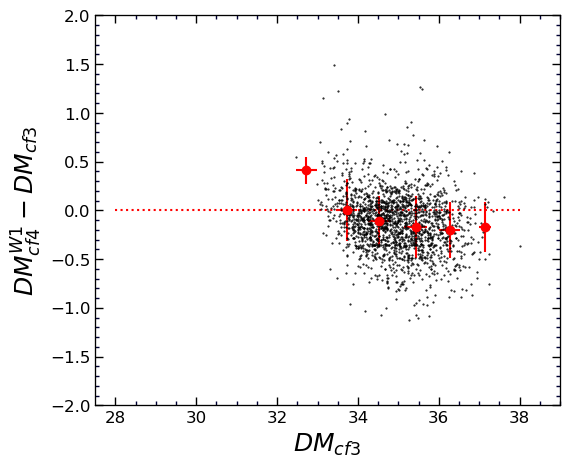

In [23]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


Y = 5.*(np.log10(Vmod) - Y)+25.

XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:      
        ix, = np.where(ID==id)
        ax.errorbar(DM_cf3[i], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(DM_cf3[i])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(29,38,1):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)               
            

ax.set_ylabel(r'$DM^{W1}_{cf4}-DM_{cf3}$', fontsize=18)                                                 
set_axes(ax, [27.5,39],[-2,2], fontsize=12)
ax.plot([28,38],[0,0], 'r:')
ax.set_xlabel('$DM_{cf3}$', fontsize=18) 


3805.0 -0.03999999999999915
5103.0 -0.12499999999999645
6853.0 -0.12999999999999545
9014.0 -0.10000000000000142
10707.0 -0.11999999999999744
12663.0 -0.12999999999999545
14731.0 -0.11999999999999744
16905.5 -0.14499999999999957
18123.0 -0.00999999999999801
-0.125150850246846


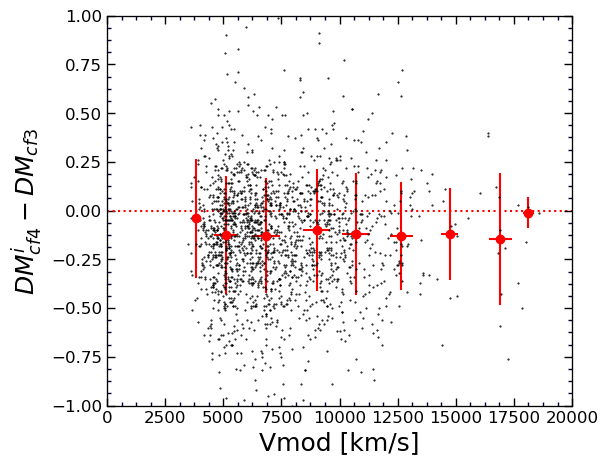

In [24]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:
        ix, = np.where(ID==id)
        ax.errorbar(V[ix][0], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(V[ix][0])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(0,20000,2000):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)      
        print np.median(xp), np.median(yp)
            

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$DM^i_{cf4}-DM_{cf3}$', fontsize=18)                                                 
            
ax.plot([0,20000],[0,0], 'r:')
set_axes(ax, [0,20000],[-1,1], fontsize=12)

# set_axes(ax, [27.5,39],[-1,1], fontsize=12)
# ax.plot([28,38],[0,0], 'r:')
# ax.set_xlabel('$DM_{cf3}$', fontsize=18) 

print np.mean(YY)

3805.0 -0.03999999999999915
5103.0 -0.12499999999999645
6853.0 -0.12999999999999545
9014.0 -0.10000000000000142
10707.0 -0.11999999999999744
12663.0 -0.12999999999999545
14731.0 -0.11999999999999744
16905.5 -0.14499999999999957
18123.0 -0.00999999999999801
-0.125150850246846


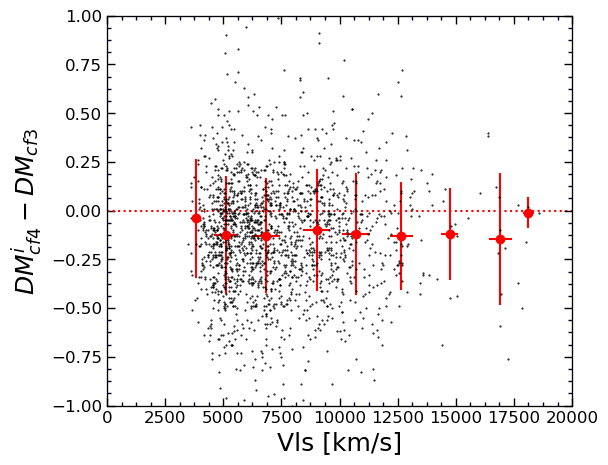

In [25]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



XX = []
YY = []
for i, id in enumerate(pgc_cf3):
    
    if id in ID:
        ix, = np.where(ID==id)
        ax.errorbar(V[ix][0], Y[ix][0]- DM_cf3[i],  capsize=3, color='k', fmt='.' , ms=1)
        XX.append(V[ix][0])
        YY.append(Y[ix][0]- DM_cf3[i])
            
for i in np.arange(0,20000,2000):
    xp = []
    yp = []
    for ii in range(len(XX)):
        xi = XX[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(YY[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)      
        print np.median(xp), np.median(yp)
            

ax.set_xlabel('Vls [km/s]', fontsize=18) 
ax.set_ylabel(r'$DM^i_{cf4}-DM_{cf3}$', fontsize=18)                                                 
            
ax.plot([0,20000],[0,0], 'r:')
set_axes(ax, [0,20000],[-1,1], fontsize=12)

# set_axes(ax, [27.5,39],[-1,1], fontsize=12)
# ax.plot([28,38],[0,0], 'r:')
# ax.set_xlabel('$DM_{cf3}$', fontsize=18) 

print np.mean(YY)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


4562 73.3
5415 73.4
6559 73.5
7481 71.8
8486 71.3
9498 73.8
10508 68.8
11484 73.0
12419 68.1
13370 77.4
14389 69.2
15227 68.2
16612 75.1
17606 65.6
73.81362810824976 70.2542554881205
[-1.95126515e-06  1.87594161e+00]
1.868136552416611
2629


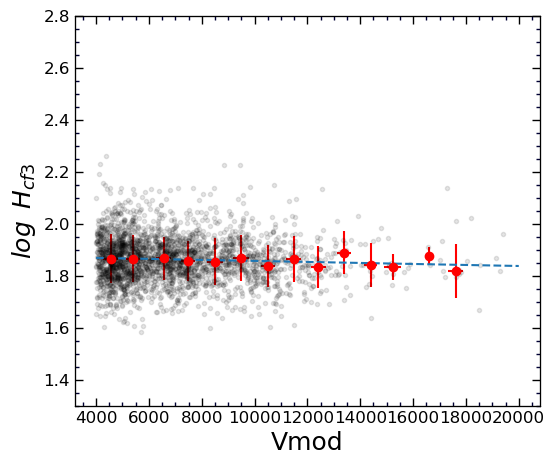

In [26]:
# pgc_edd = table['pgc']
# logWimx   = table['logWimx']
# logWimx_e = table['logWimx_e']
# inc   = table['inc']
# Vmod   = table['Vmod']

# pgc_cf3 = cf3['PGC']
# DM_cf3  = cf3['DM']
# eDM_cf3

Vmod_cf3 = []
logH_cf3 = []
eeDM_cf3 = []

for i, id in enumerate(pgc_cf3):
    
    if id in pgc_edd:      
        ix, = np.where(pgc_edd==id)
        logD_3 = (DM_cf3[i]-25)/5.
        logH_3 = np.log10(Vmod_edd[ix][0]) - logD_3
        Vmod_cf3.append(Vmod_edd[ix][0])
        logH_cf3.append(logH_3)
        eeDM_cf3.append(eDM_cf3[i])

Vmod_cf3 = np.asarray(Vmod_cf3)
logH_cf3 = np.asarray(logH_cf3)
eeDM_cf3  = np.asarray(eeDM_cf3)

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[Vmod_cf3>4000]
Y = logH_cf3[Vmod_cf3>4000]
Ye = eeDM_cf3[Vmod_cf3>4000]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1/Ye[X>4000])
ax.plot(v,c[0]*v+c[1], '--')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print len(Y)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


4574 73.5
5401 73.7
6541 73.0
7476 72.5
8493 73.3
9472 75.7
10497 74.7
11480 75.6
12426 76.1
13448 76.2
14432 75.4
15455 77.5
16458 76.0
17520 72.5
73.26122174854719 76.20013688855133
[1.55287223e-06 1.85866267e+00]
1.8648741569469809
8190


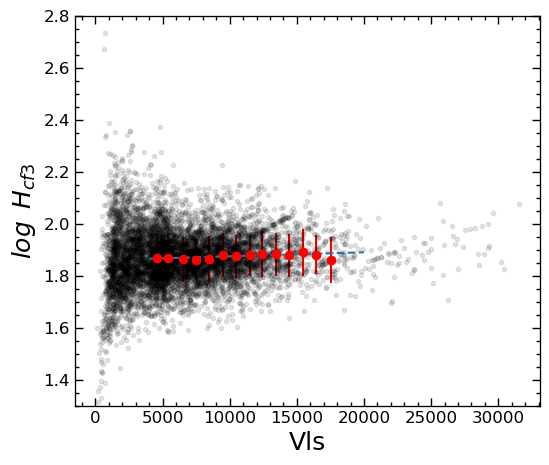

In [27]:
logD_3 = (DM_cf3-25)/5.
logH_3 = np.log10(VVmod_cf3) - logD_3

Vmod_cf3 = VVmod_cf3
logH_cf3 = logH_3
eeDM_cf3 = eDM_cf3

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[(I_cf3=='I') | (H_cf3=='H') | (F_cf3=='F')]
Y = logH_cf3[(I_cf3=='I') | (H_cf3=='H')| (F_cf3=='F')]
Ye = eeDM_cf3[(I_cf3=='I') | (H_cf3=='H')| (F_cf3=='F')]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000 :
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X[X>4000],Y[X>4000], 1, w=1/Ye[X>4000])
ax.plot(v,c[0]*v+c[1], '--')


ax.set_ylim(1.3,2.8)

set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])
print c
print c[0]*4000.+c[1]

print len(Y)

5 90.7
6 nan
7 nan
8 72.5
9 71.7
10 72.7
11 nan
12 74.0


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


(5, 15)

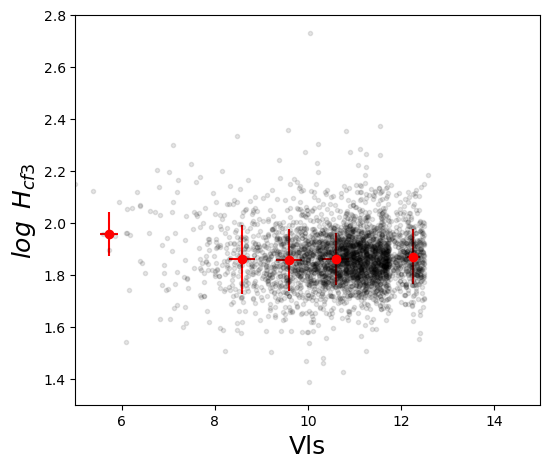

In [28]:
logD_3 = (DM_cf3-25)/5.
logH_3 = np.log10(VVmod_cf3) - logD_3

Vmod_cf3 = Ks_cf3
logH_cf3 = logH_3
eeDM_cf3 = eDM_cf3

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = Vmod_cf3[(I_cf3=='I') | (H_cf3=='H') ]
Y = logH_cf3[(I_cf3=='I') | (H_cf3=='H')]
Ye = eeDM_cf3[(I_cf3=='I') | (H_cf3=='H')]

ax.plot(X, Y, 'k.', alpha=0.1)


for i in np.arange(5,15,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1 :
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print "%d"%np.median(xp), "%.1f"%10**np.median(yp)

ax.set_xlabel('Vls', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_{cf3}$', fontsize=18) 

ax.set_ylim(1.3,2.8)
ax.set_xlim(5,15)


0.04999999999999982 0.870963589956076
0.22999999999999865 0.9332543007969886
0.41000000000000014 0.9772372209558151
0.6000000000000014 1.0
0.7999999999999989 1.0
0.9700000000000006 1.0471285480508898
1.1500000000000004 1.122018454301956


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5e1fb90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5320950>)

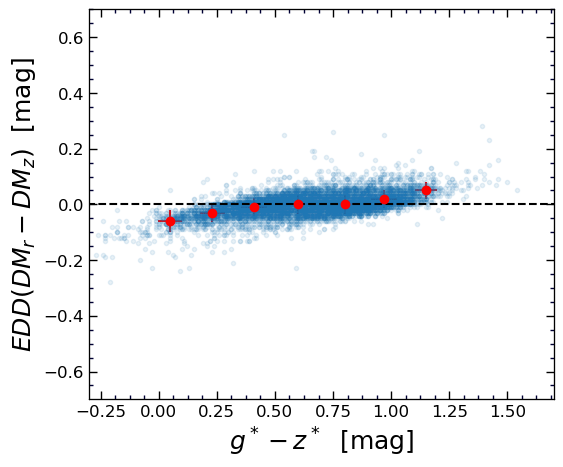

In [29]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMr[indx]-DMz[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

0.04999999999999982 0.9772372209558151
0.22999999999999865 0.9923540961320912
0.41000000000000014 1.0
0.6000000000000014 1.0077048141361136
0.7999999999999989 1.0077048141361136
0.9700000000000006 1.0077048141360971
1.1500000000000004 1.0077048141360971


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b534ec10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5230e10>)

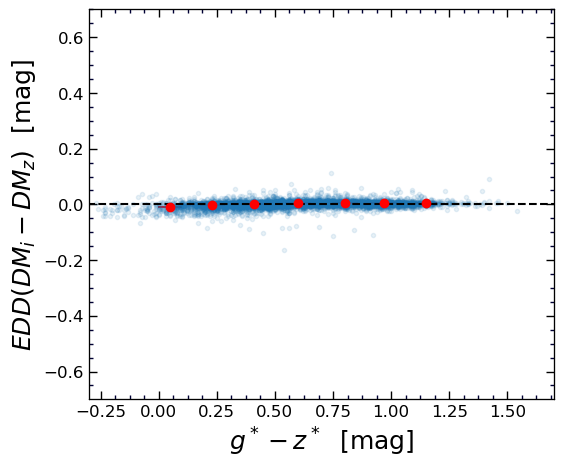

In [30]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-zzz[indx] # logWimx[indx] #
Y = DMi[indx]-(DMz[indx]+DMr[indx]+DMi[indx])/3.

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.1,1.3, 0.20):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.3,1.7)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-z^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

-0.030000000000001137 0.6600000000000037
0.07000000000000028 0.240000000000002
0.15500000000000025 0.16000000000000014
0.2599999999999998 0.10999999999999943
0.35999999999999943 0.03500000000000014
0.4599999999999991 -0.00999999999999801
0.5500000000000007 -0.030000000000001137
0.6499999999999986 -0.03999999999999915
0.75 -0.030000000000001137
0.8300000000000001 -0.01999999999999602
0.9299999999999997 -0.11999999999999744
1.0299999999999994 -0.04000000000000625
1.1400000000000006 0.03999999999999915
1.2199999999999989 -0.5899999999999999


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5da69d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5ef0090>)

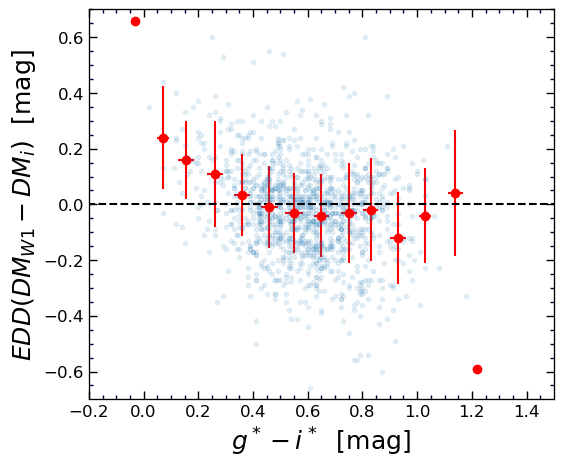

In [31]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) &
                 (Wqlt>3) & (w11>0) &(logWimx<2.6) &(logWimx>2.2))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  ggg[indx]-iii[indx] # logWimx[indx] #
Y = DM_w1[indx]-DMi[indx]

ax.plot(X, Y, '.', alpha=0.1)

# for i in np.arange(-1.8,2.8, 0.2):
for i in np.arange(-0.2,1.5, 0.10):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.10:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), np.median(yp)

ax.plot([-3,3], [0,0], 'k--')
ax.set_xlim(-0.2,1.5)
ax.set_ylim(-0.7,0.7)

ax.set_xlabel(r'$g^*-i^* $'+'  [mag]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 
set_axes(ax, fontsize=12)

In [32]:
np.median(DMi[indx]-DMz[indx])

0.00999999999999801

[-8.45020675e-07  2.93791384e-03]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5a04b10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5b3ad90>)

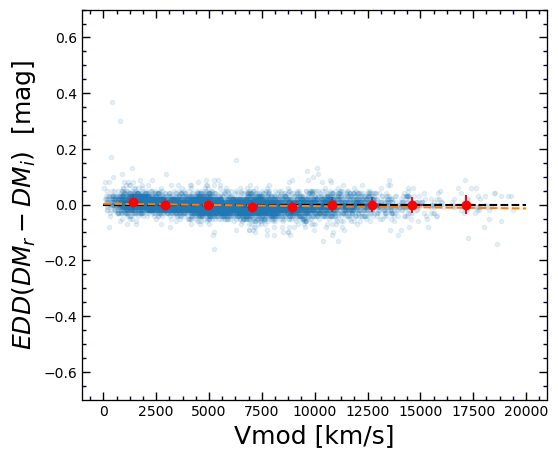

In [33]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[ 7.11693603e-07 -2.96296058e-03]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2bc09fb50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2bc0c2dd0>)

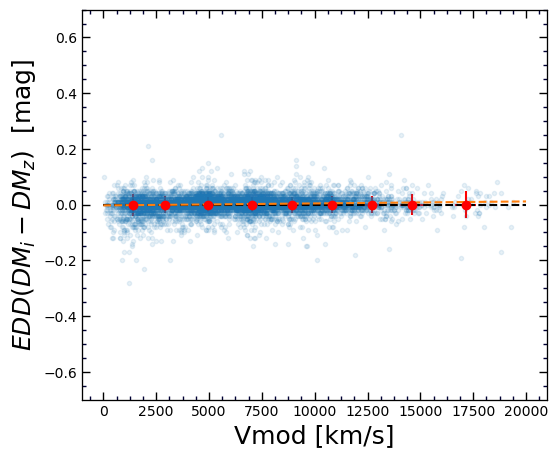

In [34]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & 
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vmod[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


v = np.linspace(0,20000,2000)
c = np.polyfit(X,Y, 1)
ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel('Vmod [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

0.006666666666667709
0.015920165166626036


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5d4be50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b4c927d0>)

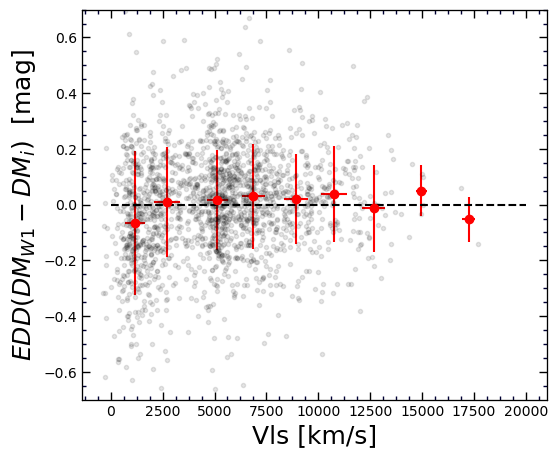

In [35]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
Vls   = table['Vls']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0) & (logWimx<10) & (logWimx>0) )


fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X =  Vls[indx] #
Y = (DM_w1[indx])-(DMr[indx]+DMi[indx]+DMz[indx])/3.
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(0,18000, 2000):
    xp = []
    yp = []
    ype  = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>0:
        yp = np.asarray(yp)
        ype = np.asarray(ype)
        yy = np.median(yp)  #    np.sum(yp/ype)/np.sum(1./ype) # 
        ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
# ax.set_xlim(0,1.5)


# v = np.linspace(0,20000,2000)
# c = np.polyfit(X,Y, 1)
# ax.plot(v,c[0]*v+c[1], '--')
ax.set_ylim(-0.7,0.7)

# c = np.polyfit(X,Y, 0, w=1./Ye)
# ax.plot(v, v*0+c[0], '--')


ax.set_xlabel('Vls [km/s]', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print  np.sum(Y/Ye)/np.sum(1./Ye)

set_axes(ax, fontsize=10)

In [36]:
indx, = np.where((zzz>0) & (Sqlt>3) & (Wqlt>3) & (Vmod<20000))
Y = DM_w1[indx]-DMz[indx]
Ye = np.sqrt(dDM_w1[indx]**2+dDMz[indx]**2)
print np.sum(Y/Ye)/np.sum(1./Ye)
np.median(Y), np.mean(Y), np.std(Y)

0.014047705004723429


(0.0, -0.00566454144188336, 0.20983385677230046)

0.0
[ 0.51939454 -2.18453854  2.23270946]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5f416d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5f45fd0>)

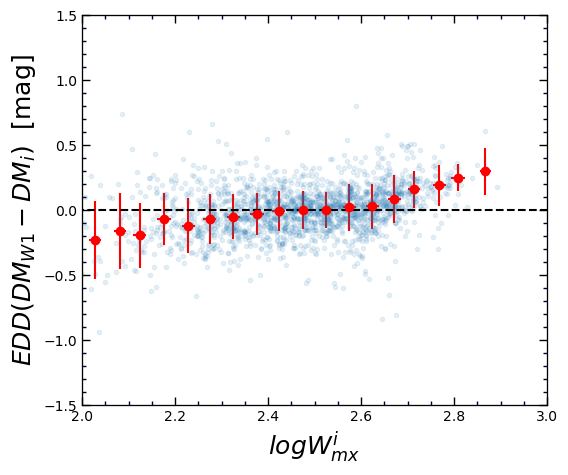

In [37]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']
dDMz = table['P0']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,0.05):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.05:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X[(X>2.0)&(X<2.9)],Y[(X>2.0)&(X<2.9)], 3, w=1./Ye[(X>2.0)&(X<2.9)])
# ax.plot(v,c[0]*v**3+c[1]*v**2+c[2]*v+c[3], 'r--')

c = np.polyfit(X, Y, 2, w=1./Ye)
# ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'g--')



ax.set_ylim(-1.5,1.5)

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print c
set_axes(ax, fontsize=10)

0.0
[-3.18762397e-05  1.02096902e-04  2.98505133e-02]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2bc5f8f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2bc705e90>)

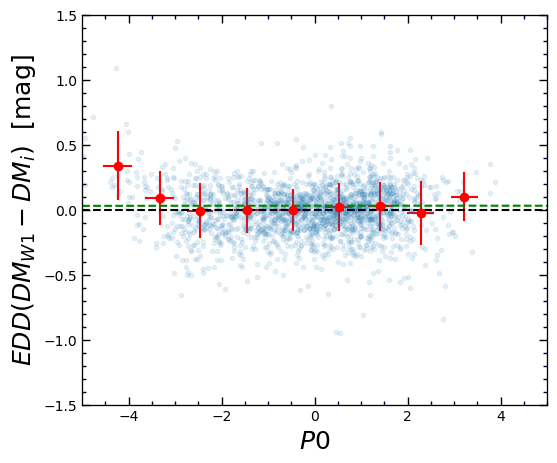

In [38]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']
P0 = table['P0']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = P0[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(-5,5,1):
    xp  = []
    yp  = []
    ype = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
            ype.append(Ye[ii])
    if len(xp)>0:
        yp = np.asarray(yp)
        ype = np.asarray(ype)
        yy =  np.sum(yp/ype)/np.sum(1./ype) # np.median(yp)  #
        ax.errorbar(np.median(xp), yy, yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([-5,5], [0,0], 'k--')
ax.set_xlim(-5,5)


v = np.linspace(-5,5,20)
c = np.polyfit(X[np.abs(X)<4], Y[np.abs(X)<4], 2, w=1./Ye[np.abs(X)<4])
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'g--')



ax.set_ylim(-1.5,1.5)

ax.set_xlabel(r'$P0$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print c
set_axes(ax, fontsize=10)

[ 0.02119809 -0.68087982]
0.0


(-1.5, 1.5)

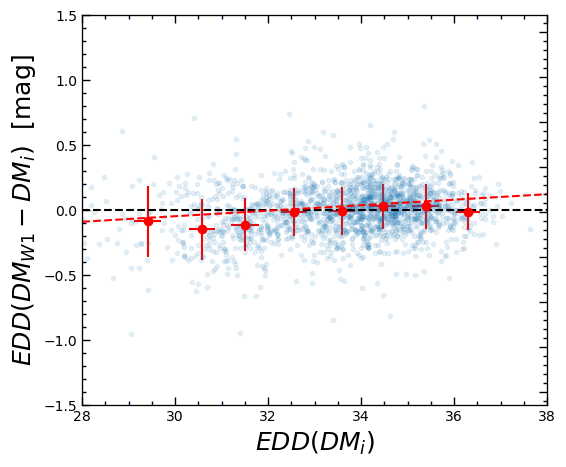

In [39]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMi[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(29,37,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1./Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{i})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)
ax.set_ylim(-1.5,1.5)

[ 0.0015444  -0.07078623  0.63901186]
-0.01999999999999602


(-1.5, 1.5)

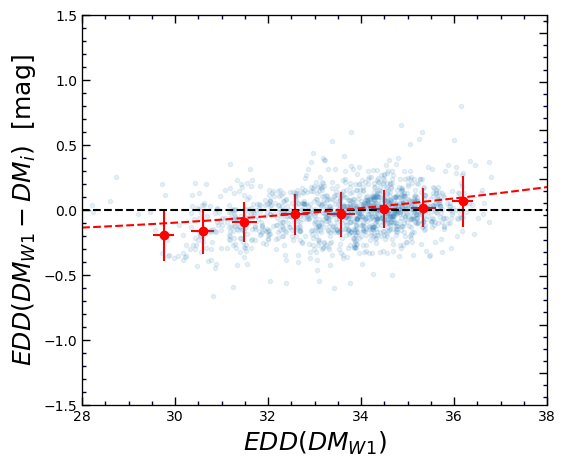

In [40]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0)&(logWimx<2.6) &(logWimx>2.2))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DM_w1[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(29,37,1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 2, w=1./Ye)
ax.plot(v,m[0]*v**2+m[1]*v+m[2], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{W1})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)
ax.set_ylim(-1.5,1.5)

[-0.28336937 -0.10988437]
0.0


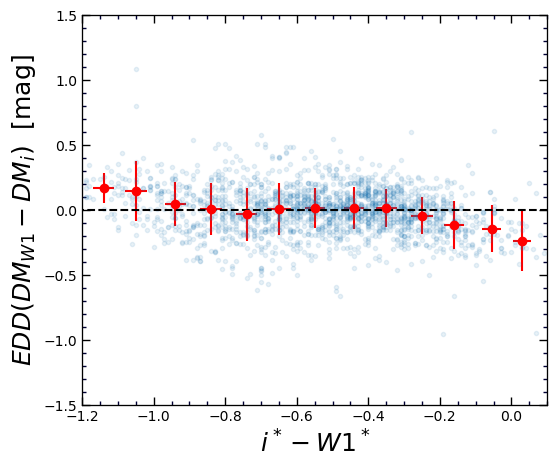

In [41]:
DMr  = table['DMr']
DMz  = table['DMz']
DMi  = table['DMi']

DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & (Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0) & (keep==1))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = iii[indx]-w11[indx] #
Y = (DM_w1[indx])-DMi[indx]
Ye = np.sqrt(dDM_w1**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(-1.2,0.1,0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(-1.2,0.1)
ax.set_ylim(-1.5,1.5)

v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1./Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$i^*-W1^*$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{W1}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
set_axes(ax, fontsize=10)

ax.plot([-2,2], [0,0], 'k--')

[-0.00165382  0.05438093]
0.0
[-0.00165382  0.05438093]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b4a30bd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2bdba2750>)

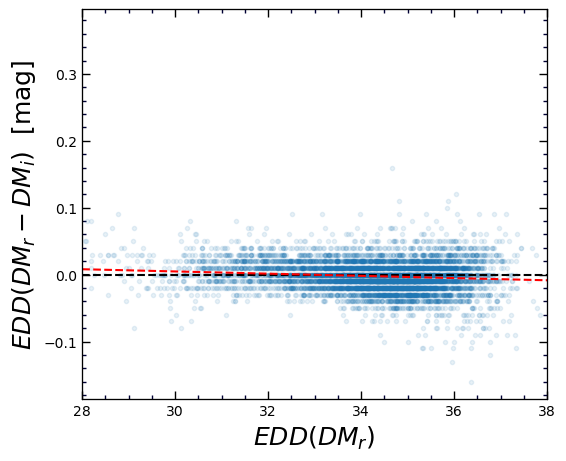

In [42]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMr[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1/Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{r})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print m
set_axes(ax, fontsize=10)

[-7.05584981e-05  5.59593708e-04]
0.0
[-7.05584981e-05  5.59593708e-04]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b54dc690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b543be50>)

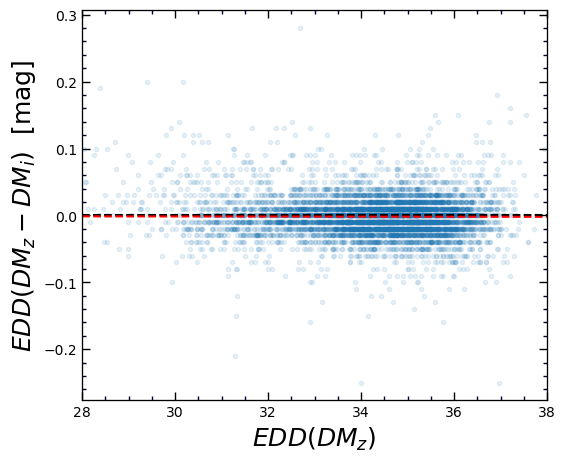

In [43]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = DMz[indx] #
Y = (DMz[indx])-DMi[indx]
Ye = np.sqrt(dDMz**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([28,38], [0,0], 'k--')
ax.set_xlim(28,38)


v = np.linspace(28,38,20)
m = np.polyfit(X, Y, 1, w=1/Ye)
ax.plot(v,m[0]*v+m[1], 'r--')
# ax.set_ylim(-0.7,0.7)

print m
ax.set_xlabel(r'$EDD(DM_{z})$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{z}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)
print m
set_axes(ax, fontsize=10)

[ 0.03983328 -0.20487248  0.25823071]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b50c7690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b5496490>)

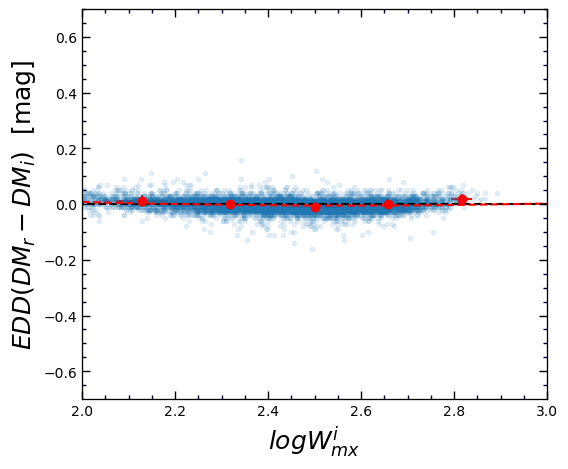

In [44]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMr[indx])-DMi[indx]
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[-0.10625659  0.52692474 -0.64642858]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2b4849610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2b48e1110>)

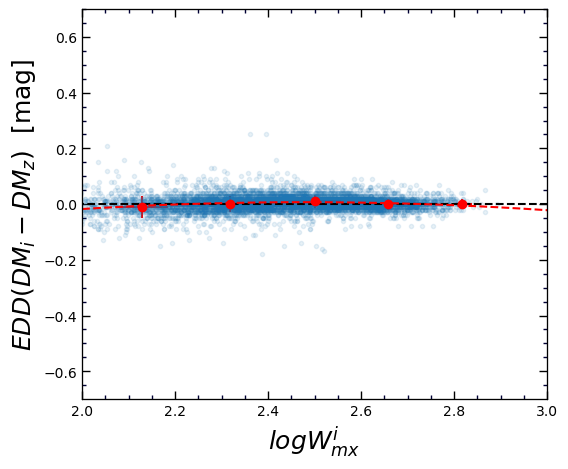

In [45]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = logWimx[indx] #
Y = (DMi[indx])-DMz[indx]
Ye = np.sqrt(dDMi**2+dDMz**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(2, 3.0,.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.20:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(2,3)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{i}-DM_z)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

[ 0.01565594  0.10868508 -0.02313003]
0.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd297b8be50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd297c05250>)

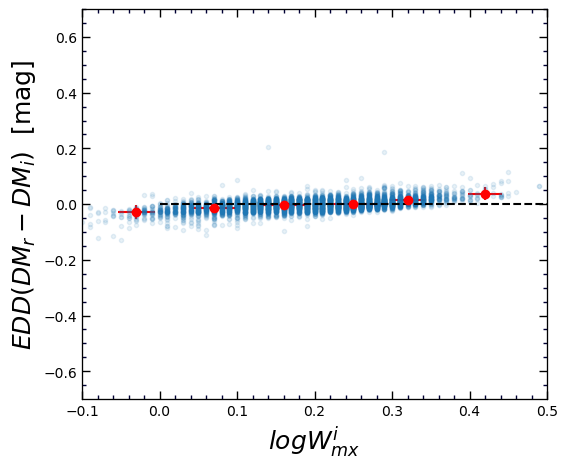

In [51]:
DMr  = table['DMr']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
Vmod   = table['Vmod']
dDM_w1 = table['dDM_w1']
dDMr = table['dDMr']
dDMi = table['dDMi']
dDMz = table['dDMz']

indx, = np.where((ggg>0) & (rrr>0) & (zzz>0) & (iii>0) & (Sqlt>3) & (keep==1) & #(Wqlt>3) & (w11>0) &
                  (Vmod<20000)& (Vmod>0))

fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

X = rrr[indx]-iii[indx] #
Y = (DMr[indx])-(DMr[indx]+DMi[indx]+DMz[indx])/3.
Ye = np.sqrt(dDMr**2+dDMi**2)
Ye = Ye[indx]

ax.plot(X, Y, '.', alpha=0.1)

for i in np.arange(-0.1, 0.5,.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.10:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
#         print np.median(xp), 10**np.median(yp)

ax.plot([0, 20000], [0,0], 'k--')
ax.set_xlim(-0.1, 0.5)


v = np.linspace(2, 3,20)
c = np.polyfit(X,Y, 2)
ax.plot(v,c[0]*v**2+c[1]*v+c[2], 'r--')
ax.set_ylim(-0.7,0.7)
print c

ax.set_xlabel(r'$logW^i_{mx}$', fontsize=18) 
ax.set_ylabel(r'$EDD(DM_{r}-DM_i)$'+'  [mag]', fontsize=18) 

print np.median(Y)

set_axes(ax, fontsize=10)

In [55]:
np.std(DMz[indx]-DMr[indx]), np.mean(DMz[indx]-DMr[indx])

(0.041483187781375275, 0.0008646779074794245)